In [1]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import time
def display_array_with_graph_and_path(array_2d, start_point, end_point, path):
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(array_2d, cmap=cmap, norm=norm, interpolation='none')

    # # Plot graph nodes
    # for node in graph_nodes:
    #     plt.plot(node[1], node[0], 'go', markersize=5)  # Green dots for graph nodes

    # Plot start and end points
    plt.plot(start_point[1], start_point[0], 'bo', markersize=8, label='Start (A)')
    plt.plot(end_point[1], end_point[0], 'yo', markersize=8, label='End (B)')

     # Plot the path
    if path:
        path_nodes = np.array(path)
        plt.plot(path_nodes[:, 1], path_nodes[:, 0], 'r-', linewidth=2, label='Shortest Path (A to B)')

    # Show legend
    #plt.legend()

    # Show colorbar
    cbar = plt.colorbar(ticks=[0, 1, 2])
    cbar.set_label('Color', rotation=270, labelpad=15)

    plt.show()
def display_array_with_graph_and_path_with_edges(array_2d, graph_nodes, start_point, end_point, path):
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(array_2d, cmap=cmap, norm=norm, interpolation='none')

    # Plot graph nodes
    for node in graph_nodes:
        plt.plot(node[1], node[0], 'go', markersize=5)  # Green dots for graph nodes

    # Plot start and end points
    plt.plot(start_point[1], start_point[0], 'bo', markersize=8, label='Start (A)')
    plt.plot(end_point[1], end_point[0], 'yo', markersize=8, label='End (B)')

    # Plot the path
    if path:
        path_nodes = np.array(path)
        plt.plot(path_nodes[:, 1], path_nodes[:, 0], 'r-', linewidth=2, label='Shortest Path (A to B)')

    # Show legend
    plt.legend()

    # Show colorbar
    cbar = plt.colorbar(ticks=[0, 1, 2])
    cbar.set_label('Color', rotation=270, labelpad=15)

    plt.show()

def get_obstacle_collided_id(edge, area):
    for point in np.linspace(edge[0], edge[1], num=100):
        x, y = map(int, point)
        if area[x, y] != 0:
            return area[x,y]
    return -1
def is_valid_edge(edge, area):
    # Check if the edge overlaps with obstacles
    for point in np.linspace(edge[0], edge[1], num=100):
        x, y = map(int, point)
        if area[x, y] != 0:
            return False
    return True
def get_obstacle(listOfObstacles, id):
    for obstacle in listOfObstacles:
        if obstacle['id']==id:
            return obstacle
def get_closest_nodes(current_node, all_nodes, n):
    distances = [np.linalg.norm(np.array(current_node) - np.array(node)) for node in all_nodes]
    sorted_indices = np.argsort(distances)
    return [all_nodes[i] for i in sorted_indices[:n]]

def get_nodes(obstacle, area):
    counter = 0
    graph_nodes = []

    x = obstacle['x']
    y = obstacle['y']
    obstacle_width_for = obstacle['width']
    obstacle_height_for = obstacle['height']
    counter = counter + 1
    if area[x - 1][y - 1] == 0:
        graph_nodes.append((x - 1, y - 1))
    if area[x - 1][y + obstacle_height_for] == 0:
        graph_nodes.append((x - 1, y + obstacle_height_for))
    if area[x + obstacle_width_for][y - 1] == 0:
        graph_nodes.append((x + obstacle_width_for, y - 1))
    if area[x + obstacle_width_for][y + obstacle_height_for] == 0:
        graph_nodes.append((x + obstacle_width_for, y + obstacle_height_for))
    return graph_nodes

def add_node(node):
    if node not in unique_graph_nodes_set:
        unique_graph_nodes_set.add(node)
        graph_nodes.append(node)

def add_back_node(node):
    if node not in unique_back_nodes_set:
        unique_back_nodes_set.add(node)
        back_nodes.append(node)
def add_new_obstacle_found(obstacle):
    obstacle_id = obstacle['id']  # Use the unique ID of the obstacle
    if obstacle_id not in unique_obstacles_found_set:
        unique_obstacles_found_set.add(obstacle_id)
        obstacles_found.append(obstacle)

 # Read the graph from graph.gexf
graph_file_path = 'Graphs/Graph1/graph.gexf'  #SOSOS SET THE PATH
G = nx.read_gexf(graph_file_path)
#num_obstacles = 25
# Create the area
file_path = 'Graphs/Graph1/area_size.txt'
# Read the file and extract area size
with open(file_path, 'r') as f:
    for line in f:

        area_size = int(line.strip())

area = np.zeros((area_size, area_size), dtype=int)


# File path
file_path = 'Graphs/Graph1/obstacles.txt'  # Update the path if necessary

# List to store obstacles
listOfObstacles = []

# Read the file and extract obstacle data
with open(file_path, 'r') as f:
    for line in f:
        # Split the line into parts
        parts = line.strip().split(', ')
        obstacle = {}

        # Process each part of the line to extract obstacle data
        for part in parts:
            key, value = part.split(": ")
            obstacle[key] = int(value)  # Convert values to integers

        # Append the obstacle dictionary to the list
        listOfObstacles.append(obstacle)

# The listOfObstacles now contains dictionaries with full obstacle data
print(listOfObstacles)


# Load the array back from the file
area = np.load('Graphs/Graph1/area.npy') #SOSOS SET THE PATH
print(area_size)
unique_graph_nodes_set = set()
unique_obstacles_found_set = set()
unique_back_nodes_set = set()

graph_nodes = []
temp_nodes = []
obstacles_found = []
obstacles_found_id = []
back_nodes = []

# Identify corners and store them as nodes

# # Get available space nodes (outside obstacles)
available_space_nodes = [(i, j) for i in range(1, area_size - 1) for j in range(1, area_size - 1) if area[i, j] == 0]
#

[{'x': 4536, 'y': 1791, 'id': 1, 'width': 4164, 'height': 97}, {'x': 7, 'y': 3636, 'id': 2, 'width': 1827, 'height': 236}, {'x': 283, 'y': 3933, 'id': 3, 'width': 3633, 'height': 2065}, {'x': 1218, 'y': 2232, 'id': 4, 'width': 1562, 'height': 1090}, {'x': 7642, 'y': 3285, 'id': 5, 'width': 731, 'height': 2505}, {'x': 4679, 'y': 5710, 'id': 6, 'width': 449, 'height': 3329}, {'x': 3056, 'y': 1089, 'id': 7, 'width': 709, 'height': 2812}, {'x': 2495, 'y': 7878, 'id': 8, 'width': 43, 'height': 1182}, {'x': 8967, 'y': 7049, 'id': 9, 'width': 139, 'height': 1333}, {'x': 6221, 'y': 7371, 'id': 10, 'width': 2407, 'height': 1893}, {'x': 8691, 'y': 5517, 'id': 11, 'width': 1092, 'height': 1001}, {'x': 1609, 'y': 330, 'id': 12, 'width': 95, 'height': 62}, {'x': 9890, 'y': 5798, 'id': 13, 'width': 16, 'height': 3522}, {'x': 4561, 'y': 1060, 'id': 14, 'width': 3163, 'height': 520}, {'x': 5301, 'y': 4923, 'id': 15, 'width': 270, 'height': 3758}, {'x': 5736, 'y': 2445, 'id': 16, 'width': 3026, 'height

Length of the shortest path: 10156.133794717416
Total execution time: 10.811079263687134 seconds
Total obstacles found: 166


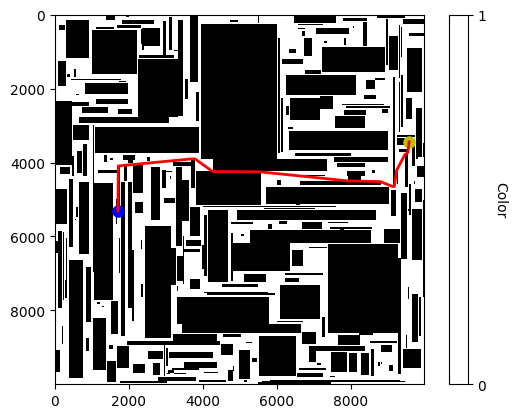

In [5]:
# # Select random start (A) and end (B) points from available space nodes
start_point, end_point = np.random.choice(np.arange(len(available_space_nodes)), size=2, replace=False)
start_point = available_space_nodes[start_point]
end_point = available_space_nodes[end_point]
# Set the start point to the top-left corner and end point to the bottom-right corner
#start_point = (1, 1)
#end_point = (area_size - 2, area_size - 2)
#start_point = (area_size/2 , 1)
#end_point = (area_size/2, area_size - 2)
G.add_nodes_from(map(tuple, graph_nodes))  # Convert nodes to tuples
# Add start and end points to the graph
G.add_node(start_point)
G.add_node(end_point)
nodes = []
#START OF THE ALGORITHM
add_node(start_point)
#graph_nodes.append(end_point)
start_time = time.time()
pathCreated = False
edge = (start_point, end_point)
if get_obstacle_collided_id(edge, area) != -1:
    obstacle = get_obstacle(listOfObstacles, get_obstacle_collided_id(edge, area))
    nodes = get_nodes(obstacle, area)
    for node in nodes:
        temp_nodes.append(node)
    nodes.clear()
    for node in temp_nodes:
        add_node(node)
    add_new_obstacle_found(obstacle)
    temp_nodes.clear()  ###
    for node in graph_nodes:
        temp_nodes.clear()
        edge_front = (node, end_point)
        edge_back = (node, start_point)
        if get_obstacle_collided_id(edge_front, area) == -1:
            #pathCreated = True
            # for node in temp_nodes:
            #     add_back_node(node)
            break


        else:
            if get_obstacle_collided_id(edge_back, area) != -1:

                obstacle_back = get_obstacle(listOfObstacles, get_obstacle_collided_id(edge_back, area))

                if obstacle_back['id'] not in unique_obstacles_found_set:
                    nodes = get_nodes(obstacle_back, area)
                    for node in nodes:
                        temp_nodes.append(node)
                    nodes.clear()
                    for node in temp_nodes:
                        add_node(node)
                    add_new_obstacle_found(obstacle_back)
                    temp_nodes.clear()  ###

            if get_obstacle_collided_id(edge_front, area) != -1:
                obstacle_front = get_obstacle(listOfObstacles, get_obstacle_collided_id(edge_front, area))

                if obstacle_front['id'] not in unique_obstacles_found_set:
                    nodes = get_nodes(obstacle_front, area)
                    for node in nodes:
                        temp_nodes.append(node)
                    nodes.clear()
                    for node in temp_nodes:
                        add_node(node)
                    temp_nodes.clear()  ###
                    add_new_obstacle_found(obstacle_front)


                # print(temp_nodes)
                # print(graph_nodes)



# for node in back_nodes:
#     add_node(node)
add_node(end_point)
threshold = area_size*2
# Connect nodes based on distance and add weights
for i, node in enumerate(graph_nodes):
    for j in range(i+1, len(graph_nodes)):
        other_node = graph_nodes[j]
        distance = np.linalg.norm(np.array(node) - np.array(other_node))
        edge = np.array([node, other_node])
        # set threshold for the distance of a possible edge
        if distance < threshold and is_valid_edge(edge, area):
            G.add_edge(tuple(node), tuple(other_node), weight=distance)  # Convert nodes to tuples



# Find the shortest path using Dijkstra's algorithm
shortest_path = None
try:
    shortest_path = nx.shortest_path(G, source=start_point, target=end_point, weight='weight')
    # Calculate the length of the shortest path
    shortest_path_length = nx.shortest_path_length(G, source=start_point, target=end_point, weight='weight')
    print(f"Length of the shortest path: {shortest_path_length}")
except nx.NetworkXNoPath:
    print("No valid path found. Please try again with different obstacle distribution.")


graph_edges = [np.array([np.array(edge[0]), np.array(edge[1])]) for edge in G.edges()]
end_time = time.time()
total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")
print(f"Total obstacles found: {len(obstacles_found)}")
display_array_with_graph_and_path(area, start_point, end_point, shortest_path)
#Display the array with the graph nodes, edges, and the shortest path
#display_array_with_graph_and_path_with_edges(area, graph_nodes,graph_edges, start_point, end_point, shortest_path)
